# USL MID EXAM

##### DATA SET DESCRIPTION : 


The Avila data set has been extracted from 800 images of the the "Avila Bible", a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain.  
The palaeographic analysis of the manuscript has individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y). The data have has been normalized, by using the Z-normalization method.

Drop the labeled(Class) column from the dataset for the clustering purpose. If required used the label column for cluster quality evaluation purpose.



* F1	=intercolumnar distance
* F2=	upper margin
* F3	=lower margin
* F4	=exploitation
* F5	=row number
* F6	=modular ratio
* F7	=interlinear spacing
* F8	=weight
* F9	=peak number
* F10	=modular ratio/ interlinear spacing
* Class=	A, B, C, D, E, F, G, H, I, W, X, Y


In [ ]:
# Kindly change the below cells from markdown to code and execute it 

### 1. Data Understanding (8 marks)

#### a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols
& types of variables (continuous, categorical etc.)? (1 MARK)



In [2]:
#Reading Dataset
import pandas as pd
df=pd.read_csv('avila.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Target
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [4]:
#NO.rows and cols
print('NUmber of rows: ', df.shape[0])
print('NUmber of columns: ', df.shape[1])

NUmber of rows:  10430
NUmber of columns:  11


In [5]:
#dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
F1        10430 non-null float64
F2        10430 non-null float64
F3        10430 non-null float64
F4        10430 non-null float64
F5        10430 non-null float64
F6        10430 non-null float64
F7        10430 non-null float64
F8        10430 non-null float64
F9        10430 non-null float64
F10       10430 non-null float64
Target    10430 non-null object
dtypes: float64(10), object(1)
memory usage: 896.5+ KB


#### b Calculate five-point summary for numerical variables (1 MARK) 

In [6]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


#### c. Summarize observations for categorical variables – no. of categories, % observations in each category.  (2 MARKS)

In [9]:
df['Target'].nunique()

12

In [7]:
df['Target'].value_counts(normalize=True)*100

A    41.093001
F    18.801534
E    10.498562
I     7.967402
X     5.004794
H     4.976031
G     4.276127
D     3.374880
Y     2.550336
C     0.987536
W     0.421860
B     0.047939
Name: Target, dtype: float64

#### d. Generate the covariance and correlation tables for the data (2 MARKS)

In [12]:
df1=df.drop('Target',1)
df1.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652


In [13]:
import numpy as np

In [16]:

cov_mat=np.cov(df1.T)

In [17]:
cov_mat

array([[ 9.82936083e-01, -1.46072935e-01,  3.82860035e-02,
        -6.53302292e-02,  4.44532339e-01, -4.98709486e-02,
        -1.52745907e-03, -4.31152501e-02,  6.40827002e-02,
        -2.83461326e-03],
       [-1.46072935e-01,  1.53732095e+01,  1.82089653e+00,
         8.01035435e-03, -2.63562111e-01,  1.87402178e+00,
         3.00019525e+00,  1.62211915e-01,  1.48839141e+00,
        -9.79663072e-02],
       [ 3.82860035e-02,  1.82089653e+00,  1.25485248e+00,
         1.62241911e-01,  1.25938552e-02,  1.67446578e-01,
         4.25555094e-01,  3.93105758e-02,  2.35387950e-01,
        -5.12087311e-02],
       [-6.53302292e-02,  8.01035435e-03,  1.62241911e-01,
         1.01712585e+00,  9.64749381e-02,  2.92624860e-01,
         5.81860867e-02,  3.43059625e-01,  3.08502167e-01,
         3.28994543e-01],
       [ 4.44532339e-01, -2.63562111e-01,  1.25938552e-02,
         9.64749381e-02,  9.84169786e-01,  4.44949697e-02,
         3.44688927e-02, -7.09016702e-02,  2.96604895e-01,
         1.

In [18]:
df1_corr=df1.corr()
df1_corr

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
F1,1.000000,-0.037577,0.034473,-0.065338,0.451966,-0.044663,-0.001173,-0.043336,0.059427,-0.002839
F2,-0.037577,1.000000,0.414578,0.002026,-0.067759,0.424384,0.582443,0.041227,0.349011,-0.024810
F3,0.034473,0.414578,1.000000,0.143608,0.011333,0.132723,0.289165,0.034970,0.193194,-0.045392
F4,-0.065338,0.002026,0.143608,1.000000,0.096426,0.257627,0.043915,0.338970,0.281239,0.323915
F5,0.451966,-0.067759,0.011333,0.096426,1.000000,0.039824,0.026447,-0.071220,0.274883,0.151590
F6,-0.044663,0.424384,0.132723,0.257627,0.039824,1.000000,0.462871,-0.059628,0.214207,0.755992
F7,-0.001173,0.582443,0.289165,0.043915,0.026447,0.462871,1.000000,0.002444,0.272458,0.263015
F8,-0.043336,0.041227,0.034970,0.338970,-0.071220,-0.059628,0.002444,1.000000,0.487543,-0.016045
F9,0.059427,0.349011,0.193194,0.281239,0.274883,0.214207,0.272458,0.487543,1.000000,0.186226
F10,-0.002839,-0.024810,-0.045392,0.323915,0.151590,0.755992,0.263015,-0.016045,0.186226,1.000000


##### e. Create Visualization plots to find the relationship amongst the variables. (2 MARKS) 

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

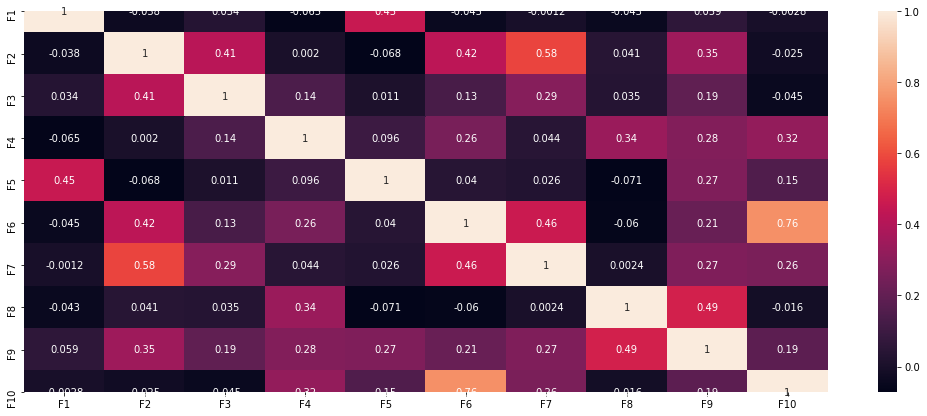

In [24]:
plt.figure(figsize=(18,7))
sns.heatmap(df1_corr,annot=True)
plt.show()

### 2. How will you decide when to apply PCA based on the correlation? (5 marks)

#### Apply PCA on the above dataset and determine the number of PCA components to be used so that 95% of the variance in data is explained by the same. (12 marks)

In [25]:
cov_mat

array([[ 9.82936083e-01, -1.46072935e-01,  3.82860035e-02,
        -6.53302292e-02,  4.44532339e-01, -4.98709486e-02,
        -1.52745907e-03, -4.31152501e-02,  6.40827002e-02,
        -2.83461326e-03],
       [-1.46072935e-01,  1.53732095e+01,  1.82089653e+00,
         8.01035435e-03, -2.63562111e-01,  1.87402178e+00,
         3.00019525e+00,  1.62211915e-01,  1.48839141e+00,
        -9.79663072e-02],
       [ 3.82860035e-02,  1.82089653e+00,  1.25485248e+00,
         1.62241911e-01,  1.25938552e-02,  1.67446578e-01,
         4.25555094e-01,  3.93105758e-02,  2.35387950e-01,
        -5.12087311e-02],
       [-6.53302292e-02,  8.01035435e-03,  1.62241911e-01,
         1.01712585e+00,  9.64749381e-02,  2.92624860e-01,
         5.81860867e-02,  3.43059625e-01,  3.08502167e-01,
         3.28994543e-01],
       [ 4.44532339e-01, -2.63562111e-01,  1.25938552e-02,
         9.64749381e-02,  9.84169786e-01,  4.44949697e-02,
         3.44688927e-02, -7.09016702e-02,  2.96604895e-01,
         1.

In [26]:
eig_val,eig_vec=np.linalg.eig(cov_mat)
print(eig_val)
print(eig_vec)

[16.66320529  2.37726984  1.69901618  1.45396132  1.05510587  0.92199898
  0.6052777   0.57039996  0.32125628  0.14346153]
[[-9.08338668e-03  6.15817169e-02  1.38758548e-01 -6.59258152e-01
  -4.60822671e-02 -7.40714579e-02 -5.93942664e-01 -3.39174572e-01
  -2.58519802e-01  1.26806601e-04]
 [ 9.57011139e-01 -1.69810878e-01  1.57811890e-02 -8.29421680e-04
  -1.32249174e-01 -1.50323424e-01 -3.58471044e-02  3.97175542e-02
   3.34545830e-02  1.04764150e-01]
 [ 1.21751741e-01  1.43670463e-02  1.79413723e-01 -7.28784502e-02
   9.08548156e-01 -1.16038275e-01  1.82793703e-01 -2.62899745e-01
   7.75453007e-02  1.35242329e-03]
 [ 7.31678908e-03  3.80147882e-01  2.64939898e-01  2.51677291e-01
   1.94622494e-01 -3.25396016e-01 -4.04521288e-01  6.06187497e-01
  -2.16703219e-01 -8.82733452e-03]
 [-1.34615608e-02  2.21999436e-01  1.88123755e-01 -6.14243735e-01
  -9.33869194e-02 -1.06470453e-01  3.21619196e-01  4.00738646e-01
   5.03193712e-01 -2.36170919e-02]
 [ 1.29083905e-01  5.00088350e-01 -3.61977

In [28]:
eigen_pairs = [(np.abs(eig_val[i]), eig_vec[ :, i]) for i in range(len(eig_val))]
eigen_pairs

[(16.66320528977928,
  array([-0.00908339,  0.95701114,  0.12175174,  0.00731679, -0.01346156,
          0.12908391,  0.20440792,  0.01340019,  0.10159245,  0.00656456])),
 (2.377269835433176,
  array([ 0.06158172, -0.16981088,  0.01436705,  0.38014788,  0.22199944,
          0.50008835,  0.28884985,  0.1544826 ,  0.31668712,  0.56186403])),
 (1.6990161840753568,
  array([ 0.13875855,  0.01578119,  0.17941372,  0.2649399 ,  0.18812376,
         -0.36197736, -0.22968929,  0.55844238,  0.5207888 , -0.27542765])),
 (1.4539613167899759,
  array([-0.65925815, -0.00082942, -0.07287845,  0.25167729, -0.61424374,
          0.07716653, -0.09661016,  0.31914066, -0.01206082,  0.04631939])),
 (1.0551058670081674,
  array([-0.04608227, -0.13224917,  0.90854816,  0.19462249, -0.09338692,
         -0.06399719,  0.20992929, -0.14130649, -0.19231685, -0.05664411])),
 (0.921998977962995,
  array([-0.07407146, -0.15032342, -0.11603827, -0.32539602, -0.10647045,
         -0.23988694,  0.83157607,  0.2082

In [29]:
tot = sum(eig_val)
var_exp = [( i /tot ) * 100 for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained', var_exp)
print()
print("Cumulative Variance Explained", cum_var_exp)

Variance Explained [64.55865977411275, 9.210314091918887, 6.58253954572057, 5.633117539093127, 4.087822211230335, 3.5721229676563095, 2.345042059821401, 2.2099143586904226, 1.244650990300031, 0.5558164614561575]

Cumulative Variance Explained [ 64.55865977  73.76897387  80.35151341  85.98463095  90.07245316
  93.64457613  95.98961819  98.19953255  99.44418354 100.        ]


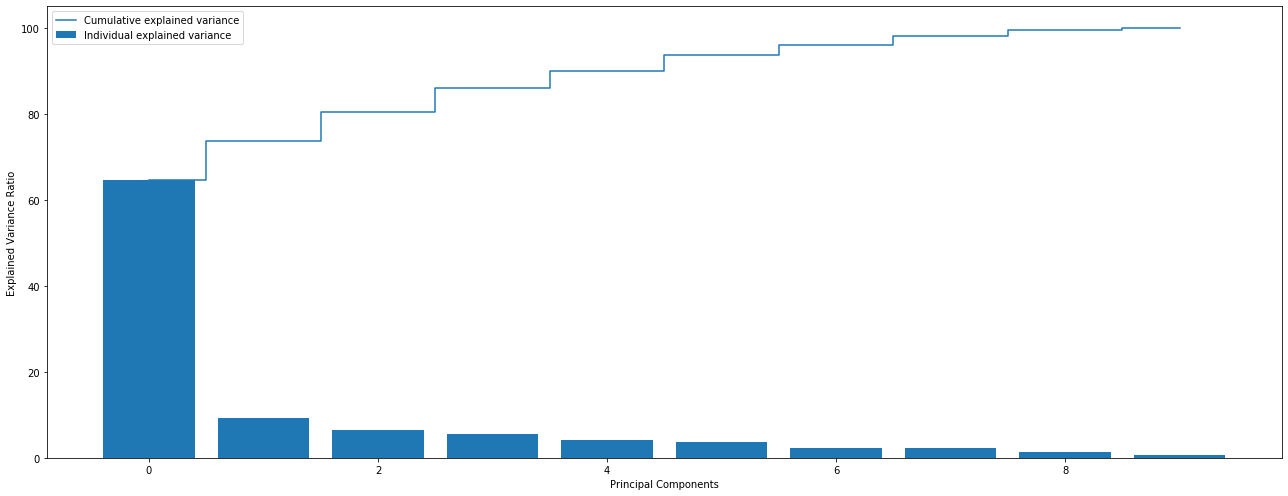

In [30]:
plt.figure(figsize=(18,7))
plt.bar(range(len(eig_val)), var_exp, label = 'Individual explained variance')
plt.step(range(len(eig_val)), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### 3. Use PCA dimensions to cluster the data. Apply K-means/ Agglomerative clustering based on the data. (25 Marks) Some pointers which would help you, but don’t be limited by these 

In [32]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(0.9598961819)
x_pc = pca.fit_transform(df1)


In [35]:
x_pc.shape

(10430, 8)

In [ ]:
#with help of pca 2 dimensions reduced

In [36]:
df1.shape

(10430, 10)

#### a. Find the optimal K Value. (6 marks)

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet

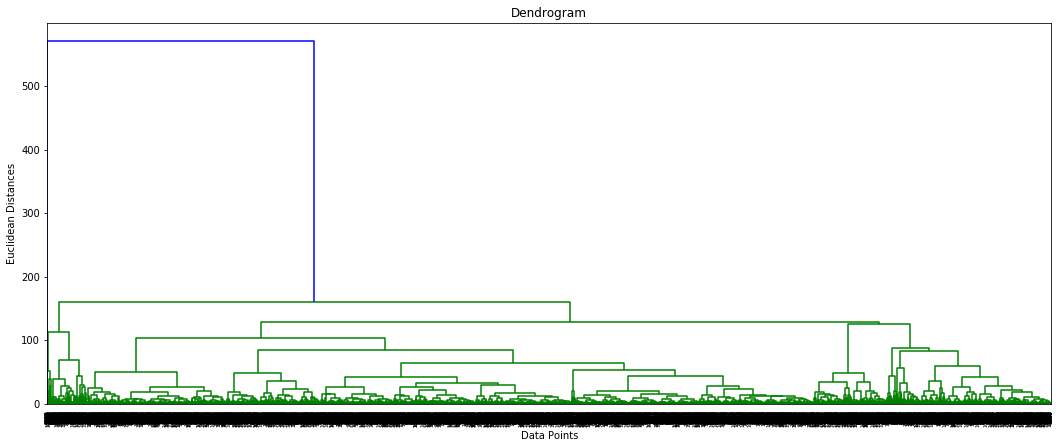

In [45]:
plt.figure(figsize=(18,7))
merg = linkage(df1,method='ward')
dendrogram(merg,leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

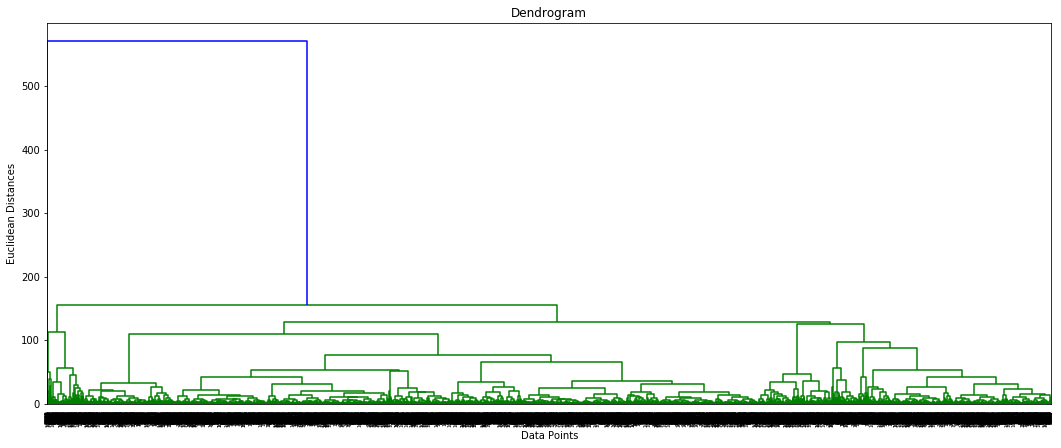

In [38]:
plt.figure(figsize=(18,7))
merg = linkage(x_pc,method='ward')
dendrogram(merg,leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [41]:
from sklearn.cluster import KMeans

In [42]:
cluster_range = list(range(1,11))
cluster_errors = []

for k in cluster_range:
    clusters = KMeans(n_clusters=k,random_state=10)
    clusters.fit(x_pc)
    cluster_errors.append(clusters.inertia_)

In [43]:
clusters_df = pd.DataFrame( { "k":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,k,cluster_errors
0,1,264335.886155
1,2,101229.772455
2,3,87600.992848
3,4,76475.776724
4,5,68611.877338
5,6,62376.079401
6,7,56149.979232
7,8,51859.946193
8,9,48371.912469
9,10,44926.071725


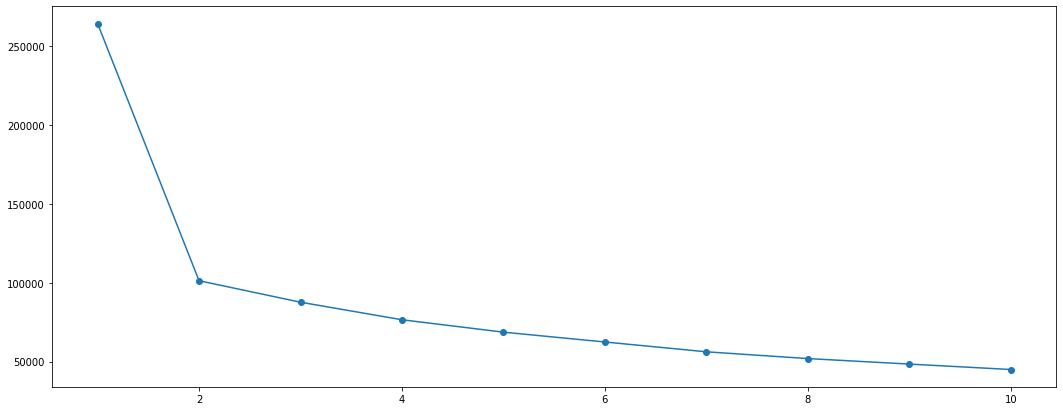

In [44]:
plt.figure(figsize=(18,7))
plt.plot(clusters_df['k'],clusters_df['cluster_errors'],marker="o");

#### b.	Apply Clustering and find out if the data points have been clustered correctly using appropriate visualization (8 marks)

In [47]:
from sklearn.cluster import AgglomerativeClustering

In [48]:
agg_cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
agg_cluster.fit(x_pc)

AgglomerativeClustering(n_clusters=4)

In [68]:
y=agg_cluster.labels_

In [69]:
silhouette_avg = silhouette_score(x_pc, y)

In [70]:
silhouette_avg 

0.2057622712812479

In [77]:
score=[]
for i in [2,3,4,5,6,7,8,9,10,11,12]:
    agg_cluster = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    agg_cluster.fit(x_pc)
    y=agg_cluster.labels_
    silhouette_avg = silhouette_score(x_pc, y)
    score.append(silhouette_avg)

In [78]:
score

[0.990743598225973,
 0.5802354771616642,
 0.2057622712812479,
 0.21676723562340308,
 0.22242453426360473,
 0.19393335882931,
 0.19214396744610557,
 0.1824498724979863,
 0.12860113560925981,
 0.12391832212278862,
 0.12707238900272483]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_pc, y, test_size = 0.2, random_state = 10)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier(random_state=10)
dt_pca = dt.fit(x_train,y_train)

In [55]:
y_pred_pca = dt_pca.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix

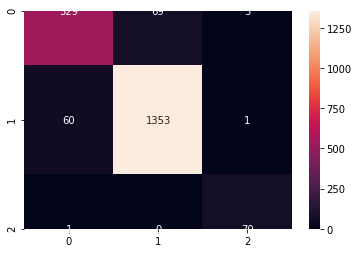

In [58]:
cm = confusion_matrix(y_test,y_pred_pca)
sns.heatmap(cm,annot=True,fmt='.0f');

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,y_pred_pca))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       601
           1       0.95      0.96      0.95      1414
           2       0.95      0.99      0.97        71

    accuracy                           0.94      2086
   macro avg       0.93      0.94      0.94      2086
weighted avg       0.94      0.94      0.94      2086



#### c.	Evaluate the clusters formed using appropriate metrics to support the model built. (6 marks)

In [62]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [67]:
for i in [0,1,2,3,4,5]:
    clusterer = KMeans(n_clusters= i , random_state=10)
    cluster_labels = clusterer.fit(df1)
    y=cluster_labels.labels_
    silhouette_avg = silhouette_score(df1, y)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:94: RuntimeWarning: divide by zero encountered in log
  n_local_trials = 2 + int(np.log(n_clusters))


OverflowError: cannot convert float infinity to integer

#### d.Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. What changes from the base model had the most effect on model performance? (5 marks)